In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
df = pd.read_csv("C:/Users/sajna/OneDrive/Desktop/ml_project/city_temperature.csv")
df.head()

C:\Users\sajna\AppData\Local\Temp\ipykernel_42912\2347715250.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/sajna/OneDrive/Desktop/ml_project/city_temperature.csv")


,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [42]:
df.tail()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8
2906326,North America,US,Additional Territories,San Juan Puerto Rico,7,31,2013,83.6


In [43]:
df.describe()

,Month,Day,Year,AvgTemperature
count,2.906327e+06,2.906327e+06,2.906327e+06,2.906327e+06
mean,6.469163e+00,1.571682e+01,2.006624e+03,5.600492e+01
std,3.456489e+00,8.800534e+00,2.338226e+01,3.212359e+01
min,1.000000e+00,0.000000e+00,2.000000e+02,-9.900000e+01
25%,3.000000e+00,8.000000e+00,2.001000e+03,4.580000e+01
50%,6.000000e+00,1.600000e+01,2.007000e+03,6.250000e+01
75%,9.000000e+00,2.300000e+01,2.013000e+03,7.550000e+01
max,1.200000e+01,3.100000e+01,2.020000e+03,1.100000e+02


In [44]:
df['AvgTemp'] = (df['AvgTemperature'] - 32) * 5/9
df = df.drop(columns=['AvgTemperature'])

In [45]:
selected_cities = [
    'Honolulu',
    'Paris', 'Rome', 'Tokyo', 'London', 'Barcelona', 'Seoul',
    'Dubai', 'Abu Dhabi', 'Doha', 'Las Vegas', 'Cairo',
    'Sapporo'
]

In [46]:
print(df.shape)

(2906327, 8)


In [47]:
s_df = df[df['City'].isin(selected_cities)]

In [48]:
s_df = s_df[['City', 'Country', 'Month', 'AvgTemp']]

In [49]:
s_df = s_df[s_df['AvgTemp'] > -99]

In [50]:
s_df.shape

(120456, 4)

In [51]:
s_df = s_df.sample(n=200, random_state=42)

In [52]:
s_df.reset_index(drop=True, inplace=True)

In [53]:
print(s_df.shape)
print(s_df.head())

(200, 4)
        City      Country  Month    AvgTemp
0      Cairo        Egypt      1  19.166667
1       Doha        Qatar      8  36.055556
2      Seoul  South Korea      1   4.111111
3  Las Vegas           US     12   8.777778
4      Paris       France     12   1.888889


In [54]:
 e_data = [
    # Maldives (Tropical)
    ['Maldives', 'Maldives', 1, 27],
    ['Maldives', 'Maldives', 2, 28],
    ['Maldives', 'Maldives', 3, 29],
    ['Maldives', 'Maldives', 4, 30],
    ['Maldives', 'Maldives', 12, 27],

    # Bali (Indonesia)
    ['Bali', 'Indonesia', 4, 28],
    ['Bali', 'Indonesia', 5, 27],
    ['Bali', 'Indonesia', 6, 26],
    ['Bali', 'Indonesia', 9, 27],

    # Manali (Hill station)
    ['Manali', 'India', 1, -1],
    ['Manali', 'India', 3, 8],
    ['Manali', 'India', 5, 18],
    ['Manali', 'India', 6, 20],
    ['Manali', 'India', 10, 10],

    # Zhangjiajie
    ['Zhangjiajie National Forest Park', 'China', 4, 16],
    ['Zhangjiajie National Forest Park', 'China', 5, 20],
    ['Zhangjiajie National Forest Park', 'China', 9, 22],
    ['Zhangjiajie National Forest Park', 'China', 10, 18],

    # Dubai (Desert)
    ['Dubai', 'UAE', 1, 19],
    ['Dubai', 'UAE', 2, 21],
    ['Dubai', 'UAE', 3, 24],
    ['Dubai', 'UAE', 12, 20],

    # Swiss Alps (Winter)
    ['Swiss Alps', 'Switzerland', 12, -5],
    ['Swiss Alps', 'Switzerland', 1, -7],
    ['Swiss Alps', 'Switzerland', 2, -6],

    # Bansko (Budget winter)
    ['Bansko', 'Bulgaria', 12, -2],
    ['Bansko', 'Bulgaria', 1, -4],
    ['Bansko', 'Bulgaria', 2, -3],
]


In [55]:
e_df = pd.DataFrame(e_data,columns=['City', 'Country', 'Month', 'AvgTemp'])

In [56]:
f_df = pd.concat([s_df, e_df], ignore_index=True)

In [57]:
f_df.shape

(228, 4)

In [58]:
f_df.isnull().sum()

City       0
Country    0
Month      0
AvgTemp    0
dtype: int64

In [59]:
f_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   City     228 non-null    object 
 1   Country  228 non-null    object 
 2   Month    228 non-null    int64  
 3   AvgTemp  228 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 7.3+ KB


In [60]:
f_df.shape

(228, 4)

In [61]:
# ml part

In [62]:
winter = ['Bansko', 'Swiss Alps', 'Manali']

In [63]:
def label_suitability(row):
    city = row['City']
    temp = row['AvgTemp']

    # Winter / snow destinations
    if city in winter:
        if temp <= 5:
            return 1   # Suitable (snow season)
        else:
            return 0

    # Normal destinations (beach, city, tropical)
    else:
        if 15 <= temp <= 30:
            return 1   # Suitable
        else:
            return 0

In [64]:
f_df['Suitable'] = f_df.apply(label_suitability, axis=1)

In [65]:
def assign_budget(row):
    city = row['City']
    month = row['Month']

    beach = ['Maldives', 'Bali', 'Dubai']
    hill = ['Manali', 'Swiss Alps', 'Bansko']

    # Beach destinations
    if city in beach:
        if month in [11, 12, 1, 2]:
            return "High"
        elif month in [3, 4, 10]:
            return "Medium"
        else:
            return "Low"

    # Hill / snow destinations
    elif city in hill:
        if month in [12, 1, 2]:
            return "High"
        elif month in [3, 10, 11]:
            return "Medium"
        else:
            return "Low"

    # Normal cities
    else:
        if month in [6, 7, 8]:
            return "High"
        elif month in [3, 4, 5, 9, 10]:
            return "Medium"
        else:
            return "Low"

f_df['Budget'] = f_df.apply(assign_budget, axis=1)

In [66]:
X = f_df[['Month', 'AvgTemp']]
y = f_df['Suitable']

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [69]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy:", accuracy)

Model Accuracy: 0.8043478260869565


In [70]:
models = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {
            "C": [0.01, 0.1, 1, 10],
            "solver": ["liblinear"]
        }
    },
    
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42, class_weight="balanced"),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [None, 5, 10],
            "min_samples_split": [2, 5]
        }
    },
    
    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42, class_weight="balanced"),
        "params": {
            "max_depth": [None, 5, 10, 20],
            "min_samples_split": [2, 5, 10]
        }
    },
    
    "SVM": {
        "model": SVC(),
        "params": {
            "C": [0.1, 1, 10],
            "kernel": ["linear", "rbf"],
            "gamma": ["scale", "auto"]
        }
    }
}

In [73]:
results = []

for name, config in models.items():
    grid = GridSearchCV(
        estimator=config["model"],
        param_grid=config["params"],
        cv=5,
        scoring="accuracy",
        n_jobs=-1
    )
    
    grid.fit(X_train, y_train)
    
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    
    results.append({
        "Model": name,
        "Best Parameters": grid.best_params_,
        "Accuracy": accuracy_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Accuracy", ascending=False)

results_df

,Model,Best Parameters,Accuracy
1,Random Forest,"{'max_depth': 5, 'min_samples_split': 5, 'n_es...",0.934783
3,SVM,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.934783
2,Decision Tree,"{'max_depth': None, 'min_samples_split': 10}",0.913043
0,Logistic Regression,"{'C': 10, 'solver': 'liblinear'}",0.804348


In [74]:
final_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_split=5,
    random_state=42,
    class_weight="balanced"
)

final_model.fit(X, y)

RandomForestClassifier(class_weight='balanced', max_depth=5,
                       min_samples_split=5, random_state=42)

In [75]:
import pickle

# Save the trained Random Forest model
with open("v_on_spot_model.pkl", "wb") as file:
    pickle.dump(final_model, file)

In [76]:
f_df.to_csv("f_df.csv", index=False)
# with open("v_on_spot_model.pkl", "rb") as file:
#     model = pickle.load(file)

In [77]:
# import pickle
# with open("v_on_spot_pickle", "wb") as file:
#     pickle.dump(model, file)

In [78]:
# with open("v_on_spot_pickle", "rb") as file:
#     mp = pickle.load(file)

In [79]:
# pickle.dump(mp, open('scaler.sav','wb'))

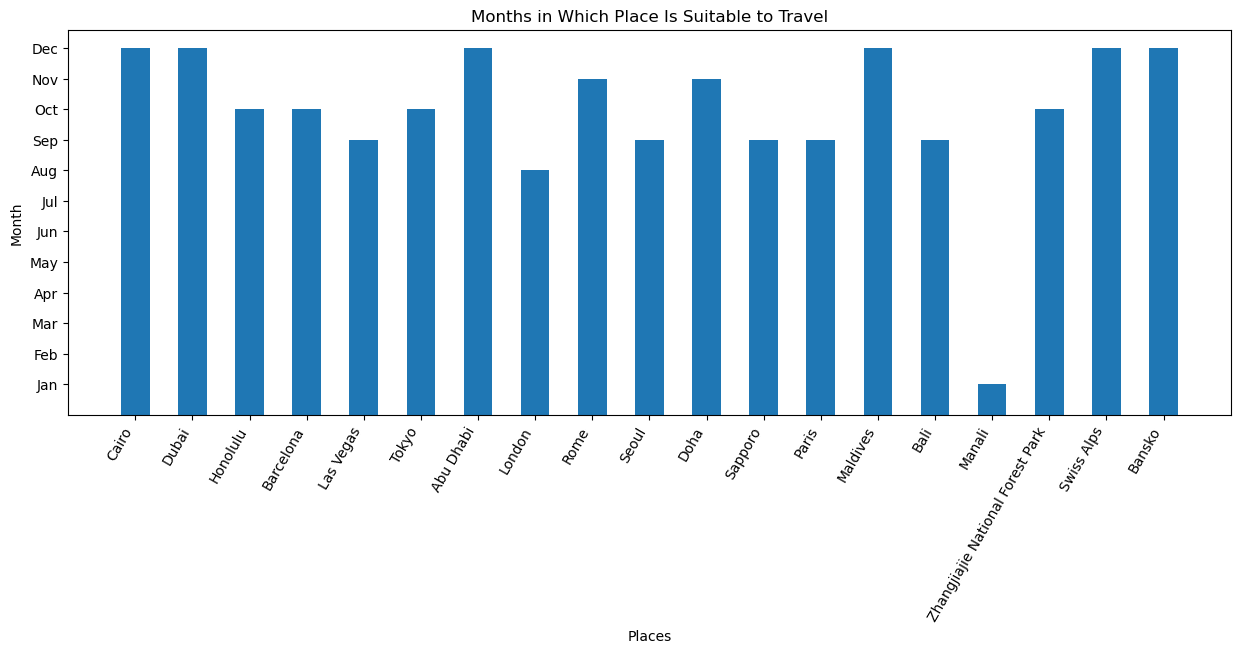

In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))   # ⬅ increase width to avoid overlap

suitable_df = f_df[f_df['Suitable'] == 1]

plt.bar(
    suitable_df['City'],
    suitable_df['Month'],
    width=0.5                 # ⬅ control bar width
)

plt.xlabel("Places")
plt.ylabel("Month")
plt.title("Months in Which Place Is Suitable to Travel")

plt.xticks(rotation=60, ha='right')   # ⬅ rotate + align labels
plt.yticks(
    range(1,13),
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
)

# plt.tight_layout()           # ⬅ very important for long names
plt.show()


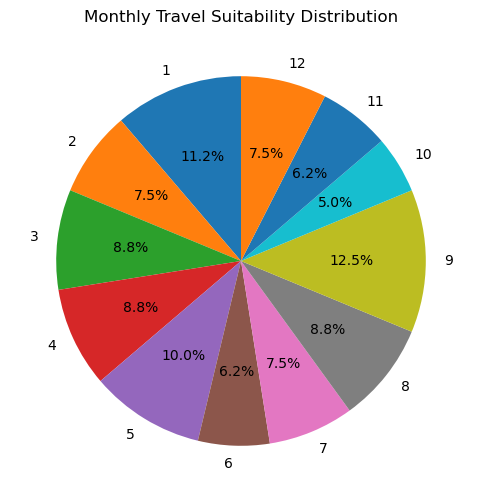

In [90]:
import matplotlib.pyplot as plt

# Count number of suitable destinations per month
month_suitability = (
    f_df[f_df['Suitable'] == 1]
    .groupby('Month')['City']
    .nunique()
)

plt.figure(figsize=(6,6))
plt.pie(
    month_suitability.values,
    labels=month_suitability.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Monthly Travel Suitability Distribution")
plt.show()


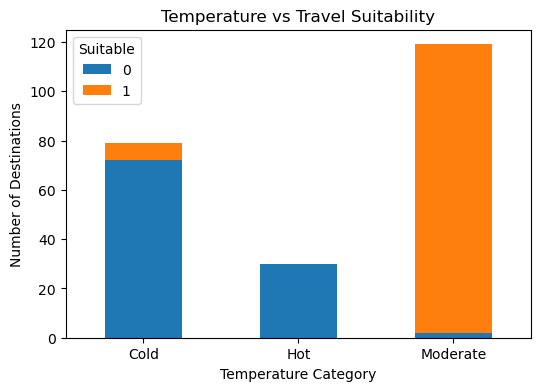

In [95]:
import matplotlib.pyplot as plt

# Step 1: Bin temperatures
def temp_category(temp):
    if temp < 15:
        return 'Cold'
    elif 15 <= temp <= 30:
        return 'Moderate'
    else:
        return 'Hot'

f_df['TempCategory'] = f_df['AvgTemp'].apply(temp_category)

# Step 2: Count suitable / non-suitable per category
temp_suitability = f_df.groupby(['TempCategory', 'Suitable'])['City'].count().unstack(fill_value=0)

# Step 3: Plot stacked bar
temp_suitability.plot(kind='bar', stacked=True, figsize=(6,4))
plt.xlabel("Temperature Category")
plt.ylabel("Number of Destinations")
plt.title("Temperature vs Travel Suitability")
plt.xticks(rotation=0)
plt.show()
